<div class="alert alert-block alert-warning">
    <h1><center> DAKD 2022 EXERCISE 1: DATA UNDERSTANDING  </center></h1>

This exercise relates to the _data understanding_ and  _data preparation_ stages of the Crisp Data Mining (CRISP-DM) model presented on the course. The questions at this stage of a data-analysis project are for example: 

- Is the data quality sufficient?
- How can we check the data for problems?
- How do we have to clean the data?
- How is the data best transformed for modeling?

It may be tempting to just run a model on data without checking it. However, not doing basic checks can ruin your whole analysis and make your results invalid as well as mislead you in further analyses. There is no excuse for not plotting and checking that the data is as we expect and clean. In this exercise we do just that, check the validity of data and familiarize ourselves with a dataset, also discussing preprocessing and multi-dimensional plotting. 
 
------------

### <font color = red> *** FILL YOUR INFORMATION BELOW *** </font>
Jeremias Shadbolt <br>
1900386 <br>
jrshad@utu.fi  <br>
5. - 13.11.  <br>


#### General guidance for exercises 

-  You can add more code and markup cells, as long as the flow of the notebook stays readable and logical.
- Answer **all** questions (except the bonus if you do not want to attempt it), even if you can't get your script to fully work
- Write clear and easily readable code, include explanations of what your code does
- Make informative illustrations: include labels for x and y axes, legends and captions for your plots
- Before saving the ipynb file (and possible printing) run: "Restart & Run all", to make sure you return a file that works as expected.
- Grading: *Fail*/*Pass*/*Pass with honors* (+1)
- If you encounter problems, Google first. If you can't find an answer to the problem, don't hesitate to ask in the Moodle discussion or directly via moodle chat.
- Don't leave it to the last moment! No feedback service during weekends.

### <font color = red> Packages needed for this exercise: </font>
- The exercise can be done without importing any extra packages, but you can import new ones but bear in mind that if you are importing many new packages, you may be complicating your answer. 

In [1]:
# --- Libraries with a short description ---
import pandas as pd # for data manipulation
import matplotlib.pyplot as plt # for plotting
import numpy as np #for numeric calculations and making simulated data.
import seaborn as sns # for plotting, an extension on matplotlib 
import matplotlib

# - sklearn has many data analysis utility functions like scaling as well as a large variety of modeling tools.
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import scale
from sklearn.manifold import TSNE

# This forces plots to be shown inline in the notebook
%matplotlib inline


<div class="alert alert-block alert-warning">
    <h1><center> PLOTTING TUTORIAL </center></h1>

This small explanation of the matplotlib package aims to avoid confusion and help you avoid common mistakes and frustration. Matplotlib is an object-oriented plotting package with the benefit of giving the user a lot of control. The downside is that it can be confusing to new users. **If you are having problems with the plotting exercises, return to this tutorial as it explains the needed concepts to do the exercises!**

-----------

###  Figure and axes 


All plots in matplotlib are structured with the **<font color = dimgrey> figure </font>** and **<font color = blue> axes </font>** objects. 

- The **<font color = dimgrey> figure </font>** object is a container for all plotting elements (in other words, everything we see).  
- A figure can have many **<font color = blue> axes </font>**. They are the objects you plot on to. The axes can be anywhere inside the figure and can even overlap. Position of axes is defined relative to the figure. 

The **<font color = blue> axes </font>** objects have the methods you will use to define most of your plots. For example axes.hist() is used to draw a histogram and axes.set_title() to give one axes a title. The name of the object can be a bit confusing as it does not refer to the axes in the way "x-axis" does but to the container of a single plot.


--------------
     
- Below is an example that illustrates how **<font color = dimgrey> figures </font>**and **<font color = blue> axes </font>** work together in matplotlib. The comments explain what is done in every row of code. <font color = green> You are encouraged to play around with it, but its not required in terms of the exercise </font>. Below, we will create all figures and axes separately, but later on we will use a quicker way to do so. 

 This is not yet a part of the exercises themselves and you do not need to change anything ! 

In [2]:
#  --- Lets make some example data. ---
x_example_data = np.linspace(0,5,10)
y_example_data = x_example_data**2

Text(3, 5, 'This is a text object relative to the inner axes')

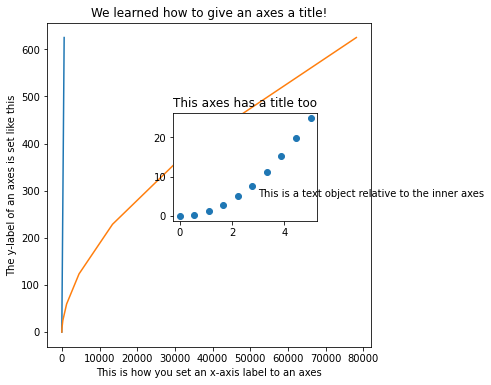

In [3]:
### Create a figure ###
example_figure = plt.figure(figsize =(5,5)) #you give the size of the figure as a tuple of inches

### Create an axes separately and add it to the figure ###
example_axes_outer = example_figure.add_axes([0.1, 0.1, 0.9, 0.9]) #the argument gives the relative location of the axes in percentage from the corners of the figure. The order is left, bottom, right, top. 

### Set labels and titles to the axes ###
example_axes_outer.set_xlabel("This is how you set an x-axis label to an axes")
example_axes_outer.set_ylabel("The y-label of an axes is set like this")
example_axes_outer.set_title("We learned how to give an axes a title!")
example_axes_inner = example_figure.add_axes([0.45, 0.45, 0.4, 0.3])
example_axes_inner.set_title("This axes has a title too")

### Add something to the axes ###
example_axes_inner.scatter(x_example_data, y_example_data)

# Multiple things, like lines can be plotted on same axis. 
example_axes_outer.plot(x_example_data**4, y_example_data**2)
example_axes_outer.plot(x_example_data**7, y_example_data**2)

# If you want to add other objects, you add them to axes too, like text
# Now you specify the location relative to the parent axes
example_axes_inner.text(3, 5, "This is a text object relative to the inner axes")

#Many more things can be added to axes in a similar way, not just text. 
#For more information there are many good tutorials available for example in youtube. 

###  Subplots: creating multiple axes and placing them in a grid on the figure 
An established convention of using matplotlib is to start plotting by calling the **<font color = blue> plt.subplots </font>** function, which automatically creates a figure and a determined number of axes in a grid inside it and automatically links the axes to the figure. Even when creating just one axes this is a often used way to start making a plot.

The most important arguments to **<font color = blue> plt.subplots </font>** are **nrows**, **ncols**, **figsize**, **sharex** and **sharey**
- **nrows** controls how many subplots there will be in the grid by row, **ncol** controls the number of columns
- **figsize** is a tuple e.g (1,5) which controls the size of the **<font color = dimgrey> figure </font>**, first is width and then height.
- sharex (True, False) tells matplotlib whether all axes in the grid should have same x-axis scale and ticks, sharey does the same for all y.

--------
Below an example on creating subplots is presented. There is also a template-like example on how to fill the subplots in a loop using the  **enumerate** function of python for indexing into the subplots. The function **enumerate()** will give you an additional int indexer over the object you are looping over. This indexer can be used to loop over the different subplot elements like the axes for each of the subplots.

**<font color = dimgrey> plt.tight_layout() </font>** is also a good command to know with subplots. It attempts to automatically arrange the different axes in a pretty way. It should be called after the plot is finished. 

In [4]:
# ----- Create some random data for the example, 3 continuous numeric features and 3 binary -----
#dont worry about understanding the function, it creates lists and is shorthand for a for loop called list comprehension.
numeric_datas = [np.random.rand(10,2) for _ in range(0,3)] #this creates list of lists of linear data, using list comprehension
binary_datas = [(np.unique(np.random.randint(0, 2, size= 10), return_counts = True)[1]) for _ in range(0,3)] # create list of lists of samples of 0,1 like (co

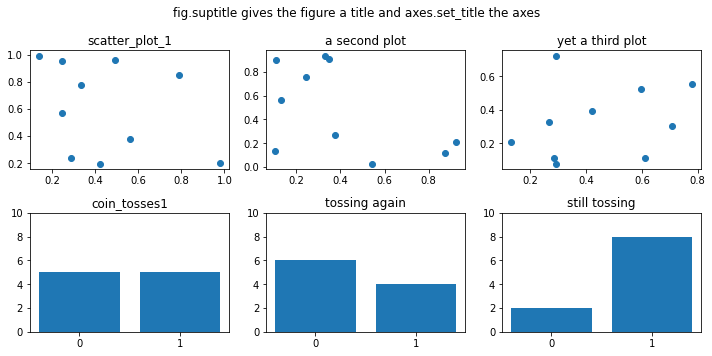

In [5]:
# Create figure with six axes in a 2*3 grid and set up titles --------------------------------------------------------
fig, axes = plt.subplots(2,3, figsize = (10,5)) # now axes have indexes like axes[i, j]
numeric_plot_titles = ['scatter_plot_1', 'a second plot', 'yet a third plot' ]#some titles for the different axes
binary_plot_titles = ['coin_tosses1', 'tossing again', 'still tossing' ]#some titles for the different axes


# Enumerate the index into the axes, fill the first 3 columns of first row with scatterplots of numeric_datas --------
i = 0 # for indexing to the row of the axes [**i**, j]
for j, numeric_data in enumerate(numeric_datas): # j = [0,1, ... n_datasets] for filling the columns, i stays constant as its the row
    axes[i, j].scatter(x = numeric_data[:, 0], y = numeric_data[:, 1]) #plots are called on the axes
    axes[i, j].set_title(numeric_plot_titles[j]) #set a title for each axes
plt.tight_layout()


# Plot the binary data -----------------------------------------------------------------------------------------------
i = 1 # second row
for j, binary_data in enumerate(binary_datas): # j = [0,1, ... n_datasets] for filling the columns, i stays constant as its the row
    axes[i, j].bar(x = ["0","1"], height = binary_data) #make a barplot
    axes[i, j].set_title(binary_plot_titles[j]) #set a title for each axes
    axes[i, j].set_ylim((0,10)) # set the yaxis limits, set_xlim works the same way.  

fig.suptitle("fig.suptitle gives the figure a title and axes.set_title the axes")
plt.tight_layout()

####  <font color = maroon> Seaborn and matplotlib </font>
- Finally, it is good to know, that the popular Seaborn plotting library is based on matplotlib, and was designed to be an extension of it and to be more user-friendly and faster to use.  

- One tip in particular that might help new users with seaborn is that two kinnds of plotting functions: for figure-level and axes-level plots. Axes level plots can be put into subplots like matplotlib plots as you saw in the example above whereas figure-level plots are done completely with seaborn. (For more information on this see https://seaborn.pydata.org/tutorial/function_overview.html)

- For axes-level plots, the matplotlib-axes object is usually given to the seaborn plotting function as an argument. There is an example below.

<AxesSubplot:ylabel='Count'>

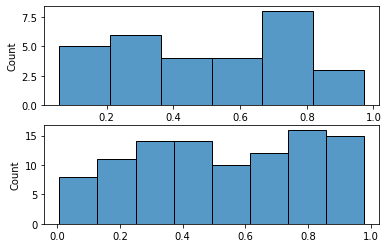

In [6]:
fig, axes = plt.subplots(2)

# make some data 
random_data_a = np.random.rand(30)
random_data_b = np.random.rand(100)

# print the data we are plotting
sns.histplot(data = random_data_a, ax = axes[0]) # we make a seaborn plot and put it into one of the axes we created
sns.histplot(data =  random_data_b, ax = axes[1]) # we make a seaborn plot and put it into one of the axes we created


<div class="alert alert-block alert-warning">
    <h1><center> START OF EXERCISES </center></h1>

##  <font color = dimgrey> 1. Introduction to the dataset </font>

The exercise data depicts data gathered on hospital patients with and without cardiovascular disease, depicted by the target variable **_cardio_**, a common disease associated with a buildup of fatty deposits inside the arteries (blood vessels) of the heart. 
 
 -------
As is often the case with data analysis projects, the features/variables have been retrieved from different sources: 
- doctors notes (texts)
- examination variables that have come from a database containing lab results or taken during a doctors examination
- self reported variables

--------------
The exercise data has the following columns/attributes:

| Feature | Type | Explanation |
| :- | :- | :-
| age | numeric | The age of the patient in days 
| sex | binary | Male/Female
| weight | numeric | Measured weight of the patient (cm)
| height | numeric | Measured weight of the patient (kg)
| ap_hi | numeric | Measured Systolic blood pressure
| ap_lo | numeric | Measured Diastolic blood pressure
| smoke | binary | A subjective feature based on asking the patient whether or not he/she smokes
| active | binary |  A subjective feature based on asking the patient whether or not he/she exercises regularly
| cholesterol | categorical | Cholesterol associated risk information evaluated by a doctor
| cardio | binary | Whether or not the patient has been diagnosed with cardiac disease.

# Small typo here btw, weight and height got mixed up

-----------
#### ***Reading data*** 

It is good practice to read the features in using their correct types instead of fixing them later. Below, there is ready-maed code for you to read in the data, using the data types and column names listed in the above table. Don't change the name of the variable, _data_. It is important in later exercises (for example in ex. 5e) that this is the name of the variable. <font color = red> If you have the dataset in the same folder as this notebook, the path already given to you should work. </font>

---------------

In [7]:
# --- READ IN DATA (no need to change) --------
data_path = "cardiovascular_disease_data_ex_1.csv" #if you just give the name of the file it will look for the data in the same folder as your script
data = pd.read_csv(data_path, dtype = {'age': 'int', 'height': 'int', 'weight':'int', 'ap_lo':'int', 'ap_hi':'int', 'sex': 'boolean', 'smoke': 'boolean',
       'active':'boolean', 'cardio':'boolean', 'cholesterol':'category'}) #the main data you use in this exercise should have this variable name, so that code given for you further on will run. 

---------
***Exercise 1 a)***
1. First, print out the first five rows of the data.

2. Then, save the feature names to lists by their types: make three lists named **numeric_features**, **binary_features** and **categorical_features**, containing the **names** of the features of each corresponding type (*you can think in terms of this exercise that binary variables can also be called booleans*).

_Saving the feature names to a list or lists and using them to subset prevents typing errors and avoids repetition!_

In [8]:
# --- Your code here for 1a) ---

# Extract aforementioned features
numeric_features = list(data.select_dtypes("int").keys())
binary_features = list(data.select_dtypes("boolean").keys())
categorical_features = list(data.select_dtypes("category").keys())

# Print the first 5 rows. Head() defaults to first 5.
data.head()

age    sex  height  weight  ap_hi  ap_lo  smoke  active  cardio  \
0  19797  False     161      55    102     68  False    True   False   
1  22571   True     178      68    120     70  False   False   False   
2  16621   True     169      69    120     80  False    True   False   
3  16688  False     156      77    120     80  False    True   False   
4  19498   True     170      98    130     80   True    True    True   

  cholesterol  
0    elevated  
1      normal  
2      normal  
3      normal  
4    elevated

In [9]:
# Verify features
print(f"Columns in numeric_features: {numeric_features}")
print(f"Columns in binary_features: {binary_features}")
print(f"Columns in categorical_features: {categorical_features}")

Columns in numeric_features: ['age', 'height', 'weight', 'ap_hi', 'ap_lo']
Columns in binary_features: ['sex', 'smoke', 'active', 'cardio']
Columns in categorical_features: ['cholesterol']


_________
## <font color = dimgrey> 2. Checking data quality
    
Often in data analysis projects the data has not been gathered exclusively for the data analysis only but originally for other reasons. Because of this, the features are most often not nicely formatted and may have mistakes. It might be tempting to just use the data as is with a model, but it is very important to first check the data for possible mistakes as they can make all the conclusions you make based on your analysis misleading. One good routine for checking data quality is to first calculate statistical descriptives and then to plot the features to check if the values are realistic. 

  
-----------    
    
Some descriptive statistics don't really make sense for certain kinds of features. In pandas, like in many other packages, some functions work differently depending on the data type of a column. In the following exercise we will look at the data descriptive statistics as well as how the behavior can change when the data types are different. 

----------
***2 a)***  Print out the data types of your dataset below.

_Perhaps the most common data types in pandas (see https://pandas.pydata.org/docs/user_guide/basics.html#basics-dtypes) are **float**, **int**, **bool** and **category**._

In [10]:
# --- 2a) Print the feature types of your dataset --- #

# print datatypes with dtypes
data.dtypes

age               int64
sex             boolean
height            int64
weight            int64
ap_hi             int64
ap_lo             int64
smoke           boolean
active          boolean
cardio          boolean
cholesterol    category
dtype: object

--------
***2 b)*** Use the **DataFrame.describe() method** in the cell below on your data.   


In [11]:
# --- Your code for 2b) --- #
# vanilla describe() to get basic stats of numerical values
data.describe()

age      height      weight       ap_hi       ap_lo
count    210.000000  210.000000  210.000000  210.000000  210.000000
mean   19455.504762  164.180952   73.895238  127.857143   81.814286
std     2429.010199    7.534648   14.612326   17.508947    9.947652
min    14367.000000  142.000000   45.000000   90.000000   50.000000
25%    17635.750000  158.000000   64.000000  120.000000   80.000000
50%    19778.000000  164.000000   70.000000  120.000000   80.000000
75%    21230.500000  170.000000   81.000000  140.000000   90.000000
max    23565.000000  195.000000  125.000000  190.000000  120.000000

--------
***2 c)*** Did you get all of the features statistics or not? What do you think happened? 

<font color = red> No, i did not since by default DataFrame.describe() includes only numerical values. In order to get data for all features with DataFrame.describe(include = 'all') as I'll do below. </font>

In [12]:
# Describe with include = 'all' to get stats of all variables
data.describe(include = 'all')

age    sex      height      weight       ap_hi       ap_lo  \
count     210.000000    210  210.000000  210.000000  210.000000  210.000000   
unique           NaN      2         NaN         NaN         NaN         NaN   
top              NaN  False         NaN         NaN         NaN         NaN   
freq             NaN    129         NaN         NaN         NaN         NaN   
mean    19455.504762    NaN  164.180952   73.895238  127.857143   81.814286   
std      2429.010199    NaN    7.534648   14.612326   17.508947    9.947652   
min     14367.000000    NaN  142.000000   45.000000   90.000000   50.000000   
25%     17635.750000    NaN  158.000000   64.000000  120.000000   80.000000   
50%     19778.000000    NaN  164.000000   70.000000  120.000000   80.000000   
75%     21230.500000    NaN  170.000000   81.000000  140.000000   90.000000   
max     23565.000000    NaN  195.000000  125.000000  190.000000  120.000000   

        smoke active cardio cholesterol  
count     210    210    210         210  
unique      2      2      2           4  
top     False   True  False      normal  
freq      186    162    105         153  
mean      NaN    NaN    NaN         NaN  
std       NaN    NaN    NaN         NaN  
min       NaN    NaN    NaN         NaN  
25%       NaN    NaN    NaN         NaN  
50%       NaN    NaN    NaN         NaN  
75%       NaN    NaN    NaN         NaN  
max       NaN    NaN    NaN         NaN

----------
***2 d)*** Calculate descriptives for the binary (boolean) features and the categorical feature <br>

_tip: in python, same type data structures can in many cases be concatenated using the + operator. If youre using the lists of names you created to subset, you can concatenate the two lists of feature names and use the resulting list to help you subset the dataframe_

In [13]:
# 2d) Your code here #

# concat lists to get required columns
bool_and_categorical = binary_features + categorical_features

# extract descriptives
data[bool_and_categorical].describe()

sex  smoke active cardio cholesterol
count     210    210    210    210         210
unique      2      2      2      2           4
top     False  False   True  False      normal
freq      129    186    162    105         153

----------
Now, we will see ***what would have happened if the data was read in using default settings*** and not giving information about the types of the features (dtypes), giving no arguments to pd.read_csv. 

Run the below cell (no need to modify the code) and look at the output of the cell with the wrongly read data. Compare it with the output of the cell where you used the correctly read data to get the descriptives. 

In [14]:
# read in the dataset with no arguments
wrongly_read_data = pd.read_csv(data_path)

# calculate descriptives for the data that was wrongly read in. 
wrongly_read_data.describe()

age         sex      height      weight       ap_hi  \
count    210.000000  210.000000  210.000000  210.000000  210.000000   
mean   19455.504762    0.385714  164.180952   73.895238  127.857143   
std     2429.010199    0.487927    7.534648   14.612326   17.508947   
min    14367.000000    0.000000  142.000000   45.000000   90.000000   
25%    17635.750000    0.000000  158.000000   64.000000  120.000000   
50%    19778.000000    0.000000  164.000000   70.000000  120.000000   
75%    21230.500000    1.000000  170.000000   81.000000  140.000000   
max    23565.000000    1.000000  195.000000  125.000000  190.000000   

            ap_lo       smoke      active      cardio  
count  210.000000  210.000000  210.000000  210.000000  
mean    81.814286    0.114286    0.771429    0.500000  
std      9.947652    0.318918    0.420916    0.501195  
min     50.000000    0.000000    0.000000    0.000000  
25%     80.000000    0.000000    1.000000    0.000000  
50%     80.000000    0.000000    1.000000    0.500000  
75%     90.000000    0.000000    1.000000    1.000000  
max    120.000000    1.000000    1.000000    1.000000

***2 e)*** 
- Looking at the above output, can you now say whats wrong with this presentation and why it was important to define the data types? 

<font color = red> Boolean values seem to be numerical at least. Age is still completely off but i believe we'll get to it later on. It was important to define dtypes right away so we won't waste time on searching through them figuring out what's wrong, and *then* redefining them with .astype(), for example </font>

-----------------------
## 3. Plotting numeric features
Descriptives don't really give a full or intuitive picture of the distribution of features. Next, we will make use of different plots to check the data quality.  

----------
***3 a)*** 

Plot the numeric features as histograms (see tutorial if you need help).

_tip: if you give only one grid-size argument for plt.subplots() like plt.subplots(3) the grid will be one-dimensional and you can index it with only one indexer._  


In [15]:
# extract dataset for plotting
numeric_data = data[numeric_features].copy()
numeric_data.head()

age  height  weight  ap_hi  ap_lo
0  19797     161      55    102     68
1  22571     178      68    120     70
2  16621     169      69    120     80
3  16688     156      77    120     80
4  19498     170      98    130     80

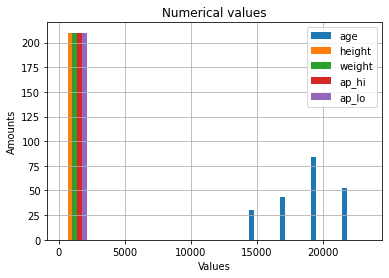

In [16]:
plt.title('Numerical values')
plt.xlabel('Values')
plt.ylabel('Amounts')
plt.grid()
plt.hist(numeric_data, bins = 10, label = numeric_features)
plt.legend()
plt.show()

What we're seeing here is that all the other values have been binned to the far left corner since the 'age' value is so large in comparison. I believe it's safe to assume there's been a mistake in age, whereas weights and others seems to be fine. Let's make sure by everything but age below

In [17]:
# numeric values excluding age
numeric_exc_age = [feature for feature in numeric_features if feature != 'age']

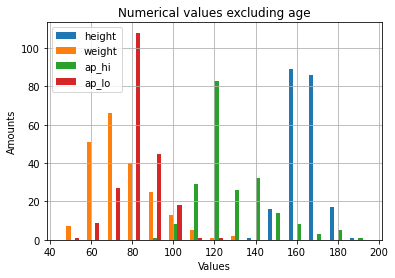

In [18]:
plt.title('Numerical values excluding age')
plt.xlabel('Values')
plt.ylabel('Amounts')
plt.grid()
plt.hist(numeric_data[numeric_exc_age], bins = 15, label = numeric_exc_age)
plt.legend()
plt.show()

LGTM so far! I've no idea how much or little those blood pressures are so fingers crossed(?) Good thing I'm not in med school. Although after consulting an actual (soon-to-be) doctor the values are ok

Edit 1: added individual histograms per feature

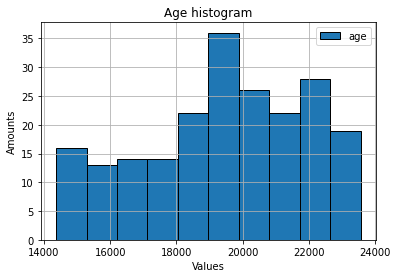

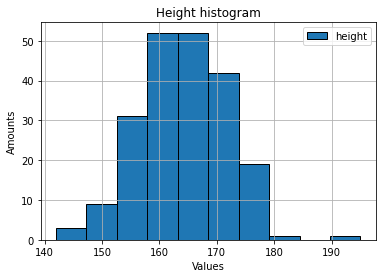

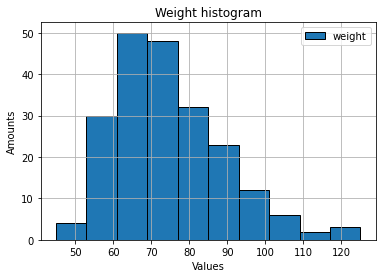

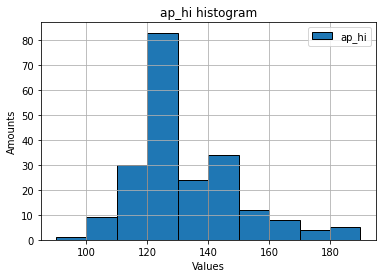

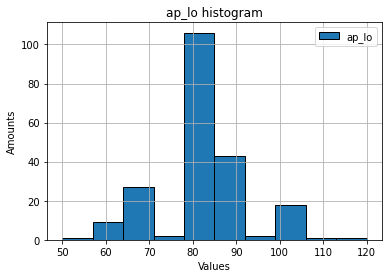

In [68]:
# separate data
age = data[numeric_features].age
height = data[numeric_features].height
weight = data[numeric_features].weight
ap_hi = data[numeric_features].ap_hi
ap_lo = data[numeric_features].ap_lo


# plot age
plt.title('Age histogram')
plt.xlabel('Values')
plt.ylabel('Amounts')
plt.grid()
plt.hist(age, bins = 10, label = 'age', edgecolor = 'black')
plt.legend()
plt.show()

# height plot
plt.title('Height histogram')
plt.xlabel('Values')
plt.ylabel('Amounts')
plt.grid()
plt.hist(height, bins = 10, label = 'height', edgecolor = 'black')
plt.legend()
plt.show()


# weight plot
plt.title('Weight histogram')
plt.xlabel('Values')
plt.ylabel('Amounts')
plt.grid()
plt.hist(weight, bins = 10, label = 'weight', edgecolor = 'black')
plt.legend()
plt.show()

# ap_hi plot
plt.title('ap_hi histogram')
plt.xlabel('Values')
plt.ylabel('Amounts')
plt.grid()
plt.hist(ap_hi, bins = 10, label = 'ap_hi', edgecolor = 'black')
plt.legend()
plt.show()


# ap_lo plot
plt.title('ap_lo histogram')
plt.xlabel('Values')
plt.ylabel('Amounts')
plt.grid()
plt.hist(ap_lo, bins = 10, label = 'ap_lo', edgecolor = 'black')
plt.legend()
plt.show()

I'm still failing to see how age is ok, but if you say so then I've got to believe you. 

Nevertheless, all the data seems to be distributed in a logical way -- 180-190cm people quite rare, as well as people over 90 kilos. They'd seem to go hand in hand since people who tend to be taller tend to be heavier as well. Also there seems to be an about equal amount of high blood pressures with (relative to this dataset) heavy weight. 

_______
## 4. Plotting binary and categorical features

***4 a)*** Plot **barplots** for each of the non-numeric features. **Use fractions, not the real frequencies of the levels of these features**.

--------------

_tip: For plotting, see documentation on axes.bar. To get the fractions, see the value_counts function and its optional argument normalize._

_If you read in the dtypes to be pandas dtype.boolean, in some cases its easier to work with other packages, suchs as matplotlib when they are represented as numbers [0,1] and not True or False. If you get errors you can try to cast them momentarily to be int or float with astype. This does not mean that you've done the exercise incorrectly, just that you have to change them for the plotting package._ 

In [19]:
# Check values before plotting
for value in data[bool_and_categorical]:
    print(data[value].unique())

<BooleanArray>
[False, True]
Length: 2, dtype: boolean
<BooleanArray>
[False, True]
Length: 2, dtype: boolean
<BooleanArray>
[True, False]
Length: 2, dtype: boolean
<BooleanArray>
[False, True]
Length: 2, dtype: boolean
['elevated', 'normal', 'at risk', 'elev ated']
Categories (4, object): ['elevated', 'normal', 'at risk', 'elev ated']


In [20]:
# fix 'elev ated' in dataset
data.loc[data['cholesterol'] == 'elev ated', 'cholesterol'] = 'elevated'

In [21]:
# verify
print(data['cholesterol'].unique())

['elevated', 'normal', 'at risk']
Categories (3, object): ['elevated', 'normal', 'at risk']


In [22]:
# remind me of the keys
data[bool_and_categorical].keys()

Index(['sex', 'smoke', 'active', 'cardio', 'cholesterol'], dtype='object')

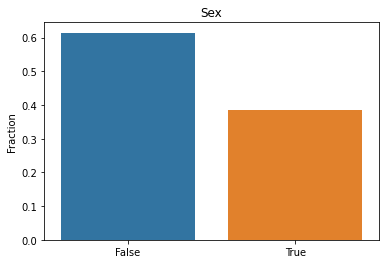

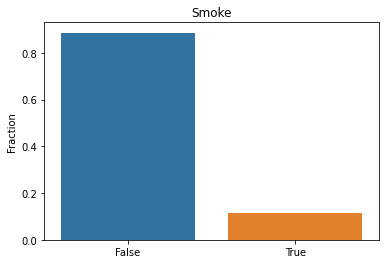

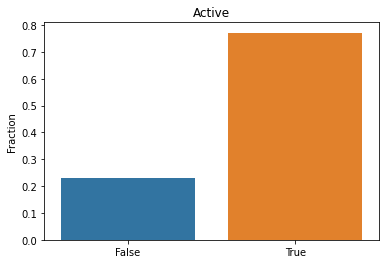

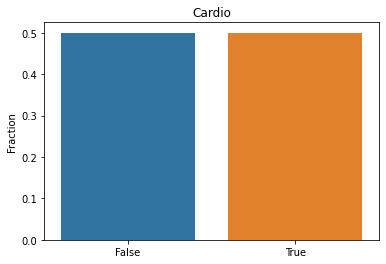

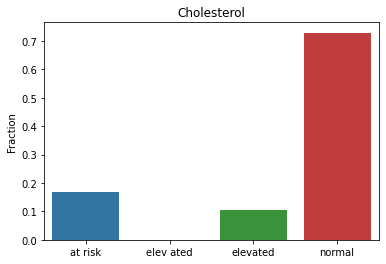

In [23]:
# get value counts
sex = data.sex.value_counts(normalize = True)
smoke = data.smoke.value_counts(normalize = True)
active = data.active.value_counts(normalize = True)
cardio = data.cardio.value_counts(normalize = True)
cholesterol = data.cholesterol.value_counts(normalize = True)

# sex plot

sns.barplot(x = sex.index, y = sex)
plt.title('Sex')
plt.ylabel('Fraction')
plt.show()


# smoke plot
sns.barplot(x = smoke.index, y = smoke)
plt.title('Smoke')
plt.ylabel('Fraction')
plt.show()

# active plot
sns.barplot(x = active.index, y = active)
plt.title('Active')
plt.ylabel('Fraction')
plt.show()

# cardio plot
sns.barplot(x = cardio.index, y = cardio)
plt.title('Cardio')
plt.ylabel('Fraction')
plt.show()

# cholesterol plot
sns.barplot(x = cholesterol.index, y = cholesterol)
plt.title('Cholesterol')
plt.ylabel('Fraction')
plt.show()

**4 b)** 

Do you see something odd with one of the features? Fix it. 

_If you read the dtype of the categorical feature to be pandas dtype.categorical, **you have to also use the pandas function remove_categories to remove the category level from the feature**, even if you would have already removed the value. You can do this like: _data['feature_name'] = data['feature_name'].cat.remove_categories("category name to delete")_

#### Lol i thought i were slick when i figured out that there was something funky with the data in beforehand. This i didn't know about though

In [24]:
# fix categorical data
data['cholesterol'] = data['cholesterol'].cat.remove_categories('elev ated')

In [25]:
#verify
print(data['cholesterol'].cat.categories.tolist())
print(data['cholesterol'].value_counts())

['at risk', 'elevated', 'normal']
normal      153
at risk      35
elevated     22
Name: cholesterol, dtype: int64


-------------

## 5. Preprocessing numeric features

Scaling the data improves the performance of machine learning algorithms in many cases, or perhaps better put, can ruin performance if not done. For instance with distance based algorithms covered in the course such as PCA, T-SNE and KNN some features with large values can dominate the distance calculations. 

-----------
We will look at two often used ways of bringing the values to the same scale: **min-max scaling to [0,1]** and **standardizing the features to 0 mean and unit variance**. We will see, that the decision has implications on how the data will look afterwards. Standardizing values is very common in statistics and min-max scaling is for example used in training neural networks, where we want the range to match the range of an activation function in the network. Its good to know both. 

Two functions, sklearn.minmax_scale and sklearn.scale have been imported for you and you can use them in the following exercises.
__________________________



**5 a)** In this exercise we will use boxplots. Explain what a boxplot is and what information it gives you. 

A boxplot is a standardized way of visualizing the distribution of data.
Looking at the boxplot created below there are five key points to look at.

    -minimum
    -maximum
    -median
    -first quartile
    -third quartile

- Minimum is the 0th quartile or 0th percentile. Lowest point in data excluding outliers.
- Maximum is the 4th quartile or 100th percentile. Highest point in data excluding outliers. 
- The median is the 2nd quartile or 50th percentile of the data. The value in the middle. 
- The first quartile or 25th percentile of the data is the median of the lower half of the dataset. One way to think about this is that 75 % of the data is larger than the 1st quartile and 25 % is less. 
- The third quartile or 75th percentile is the median of the upper half of the dataset. One way to think about this is that 25 % of the data is larger than this *or* that 75 % of data is less than this.


Those strange lines at the end of those lines represent the minimums and maximums. So in this dataset, the maximum age of the passengers was around 65, excluding outliers, and the smallest was a little more than 0. 

Minimums and maximums are calculated as follows: 
- Maximum: Q3 + 1.5*IQR
- Minimum: Q1 -1.5*IQR

Where IQR stands for interquantile range is the distance between the first and third quartiles. It's calculated by subtracting the first quartile value from the third. 

So everything larger or smaller than Maximum or Minimum are considered an outlier.

Outliers can be spotted as dots above the line for maximum. Here, for example, outliers under the minimum line would mean the data isn't reliable, since age can't be negative and procedures would be needed. 

The black line in the middle of the blue box is the median. It's the middle value of the whole dataset. 

The upper line of the blue box is the third quartile -- it's larger than 75 % of the rest of the data. 

The lower line is the first quartile -- it's smaller than 75 % of the data. 

The box itself is the Interquartile range.

Here we can interpret that people aged 40 were older than 75 % of the rest whilst people around 20 were younger than 75 % of the rest. 

The lines between max and min represent the 25 % of values higher or lower than 1st or 3rd quartile. 

In [26]:
# use titanic-data from Seaborn datasets
boxplot_reference_data = sns.load_dataset('titanic')

<AxesSubplot:>

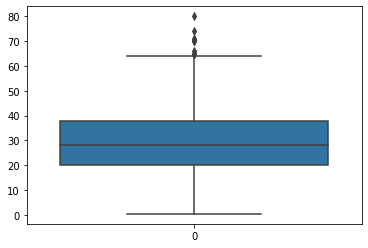

In [27]:
 # create boxplot with Seaborn
sns.boxplot(boxplot_reference_data['age'])

**5 b)** Min-max numeric attributes to [0,1] and **store the results in a new dataframe called data_min_maxed**. You might have to wrap the data to a dataframe again using pd.DataFrame()

In [28]:
# --- Your code for 5b) here --- #
# use the variable name data_min_maxed

# Creating a new df with the numeric values minmaxxed, giving them their column names instead of 0...n which
# they'd have by default

data_min_maxed = pd.DataFrame(minmax_scale(data[numeric_features]), columns = numeric_features)

In [29]:
# verify
data_min_maxed.head()

age    height  weight  ap_hi     ap_lo
0  0.590346  0.358491  0.1250   0.12  0.257143
1  0.891933  0.679245  0.2875   0.30  0.285714
2  0.245053  0.509434  0.3000   0.30  0.428571
3  0.252337  0.264151  0.4000   0.30  0.428571
4  0.557839  0.528302  0.6625   0.40  0.428571

**5 c)** Standardize numeric attributes to 0 mean and unit variance and **store the results in a new dataframe called data_standardized**

In [30]:
# Your code for 5c here --- #
data_standardized = pd.DataFrame(scale(data[numeric_features]), columns = numeric_features)

In [31]:
data_standardized.head()

age    height    weight     ap_hi     ap_lo
0  0.140926 -0.423185 -1.296193 -1.480325 -1.392016
1  1.285684  1.838449 -0.404407 -0.449822 -1.190484
2 -1.169727  0.641113 -0.335808 -0.449822 -0.182819
3 -1.142077 -1.088372  0.212983 -0.449822 -0.182819
4  0.017537  0.774151  1.653560  0.122679 -0.182819

In [32]:
# verify
print(f"unit variance:\n {data_standardized.std()}")
print('\n')
print(f"mean:\n {data_standardized.mean()}")

unit variance:
 age       1.002389
height    1.002389
weight    1.002389
ap_hi     1.002389
ap_lo     1.002389
dtype: float64


mean:
 age       6.132661e-17
height   -1.341784e-15
weight   -2.511219e-16
ap_hi    -3.156205e-16
ap_lo    -2.558800e-16
dtype: float64


##### no clue how to get 0 mean and unit variance, this is as far as i got in this excercise

**5 d)** Make two boxplots of the 'age' feature, one plot with the data_min_maxed and one with the data_standardized. Preferably put the plots side-by-side and give each titles. See the tutorial in the beginning for help. 

In [33]:
# create dataframes
minmax_age = pd.DataFrame(minmax_scale(data['age']), columns = ['ageminmax'])
standardized_age = pd.DataFrame(scale(data['age']), columns = ['agestd'])

# merge dataframes to one by their indexes
exc_data = pd.merge(minmax_age, standardized_age, right_index = True, left_index = True)

In [34]:
# verify
exc_data.head()

ageminmax    agestd
0   0.590346  0.140926
1   0.891933  1.285684
2   0.245053 -1.169727
3   0.252337 -1.142077
4   0.557839  0.017537

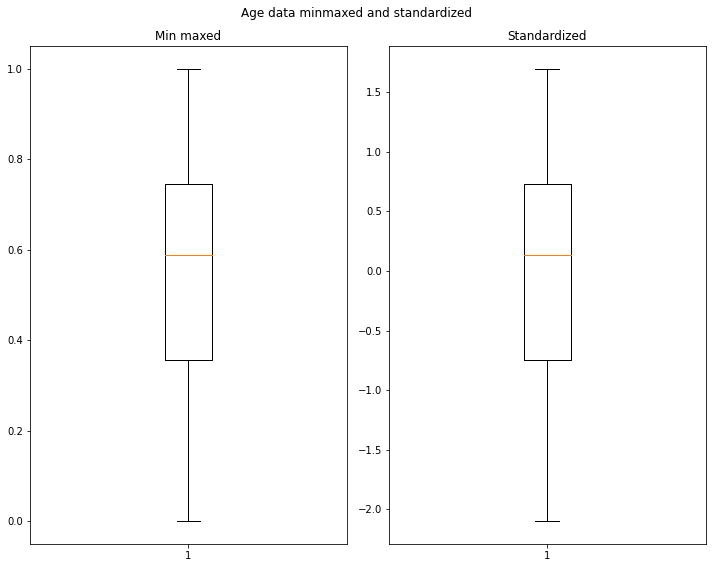

In [35]:
# Setup vizualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,8))

fig.suptitle('Age data minmaxed and standardized')

#Visualize min maxed age
ax1.boxplot(exc_data['ageminmax'])
ax1.set_title('Min maxed')

#visualize standardized age
ax2.boxplot(exc_data['agestd'])
ax2.set_title('Standardized')

plt.tight_layout()

---------

Lets see the differences of these preprocessing methods through an example. We will add an "outlier" point (some point with a large value) to replace the 
last value in both data, then again minmax and standardize and plot. The code to add the value is given for you and you shouldn't change it. 

--------------------

***5e) Do the following:***
1. Take the data for the age feature (age_w_outlier) provided for you
2. Make two variables, age_w_outlier_minmaxed, containing the min-maxed values of the age_w_outlier and
3.  age_w_outlier_standardized containing the standardized values for the age_w_outlier


In [36]:
### Add an outlier, DONT CHANGE THIS CELL CODE, JUST RUN IT ###
data_w_outlier = data.copy() #data should be the name of the variable where you have stored your data!
data_w_outlier.loc[data.shape[0] -1 , 'age'] = 150 #change the last value of age to be 150
age_w_outlier = data_w_outlier.age

In [37]:
# --- Your code for 5e) --- 

# create age_w_outlier_minmaxed 
age_w_outlier_minmaxed = minmax_scale(age_w_outlier)

# create age_w_outlier_standardized
age_w_outlier_standardized = scale(age_w_outlier)

***Below there is pre-written code for you to plot the different cases. Run it. The code should run if you have named your features appropriately. Run the code.***

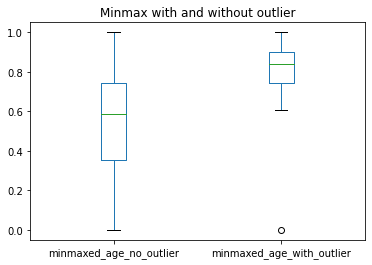

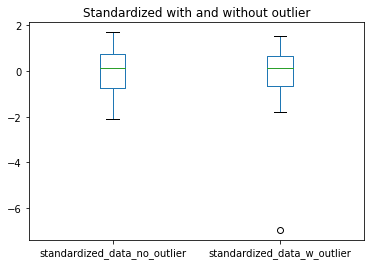

In [38]:
# Wrap in a dataframe that will have two features - the age feature without the outlier, and the age feature with it, min-maxed.
minmaxed_datas = pd.DataFrame({"minmaxed_age_no_outlier" : data_min_maxed.age, 
              "minmaxed_age_with_outlier": age_w_outlier_minmaxed })

# Wrap in a dataframe that will have two features - the age feature without the outlier, and the age feature with it, standardized. 
standardized_datas = pd.DataFrame({"standardized_data_no_outlier" : data_standardized.age, 
              "standardized_data_w_outlier": age_w_outlier_standardized })

axes_minmaxed = minmaxed_datas[['minmaxed_age_no_outlier', 'minmaxed_age_with_outlier']].plot(kind='box', title='Minmax with and without outlier')
axes_std = standardized_datas[['standardized_data_no_outlier', 'standardized_data_w_outlier']].plot(kind='box', title='Standardized with and without outlier')

----------
**5 f) Look at the output of the above cell and answer the following**: 

1. Can you notice a difference between the two cases (min-maxed and standardized)? 
2. Can you say something about the difference of the effect of min-maxing and standardization?


1. Minmax seems to be quite aggressively affected by the outlier. Judging by the boxplots, all the boxplot variables (mentioned above) are affected by the singular outlier. Standardized data on the other hand seems to be quite robust to the outlier. I believe it's because minmax's formula is X = (X - Xmin) / (Xmax - Xmin) where min and max values have greater effect on the value X. Standardization on the other hand is calculated with X = (X - mean(values)) / standard_deviation, so the outliers don't affect as much. 

2. As minmax tries to keep all values between [0,1], one exceptionally large/small value causes the other values to be  far different from the outlier thus causing the results to be negatively affected. Standardizing uses mean and std to calculate the values so it's more robust to outliers since one or two values that are completely different don't affect the calculations as much. 

---------------
## 6. Preprocessing categorical features



We can roughly divide categorical variables/features to two types:  ***nominal categorical***  and  ***ordinal categorical*** variables/features. Some cases are clear in terms of which of the two a feature falls into. For example nationality is not an ordered feature, but which grade in school someone is has a natural ordering. **One-hot encoding** was presented in the lectures and will be used in the following exercises with different learning methods.


-----
***Nominal categorical features need to be encoded***, because not encoding them implies that they have an order. For example, consider a dataset where you would have rows by different countries, encoded randomly with numbers, for ex. Finland = 1, Norway = 2 and so on. For some analyses and methods this would imply that Norway is somehow "greater" in value than Finland. For some algorithms, the implication would also be, that some of the countries would be "closer" to each other. 

------
***Ordinal categorical features do not necessarily need to be encoded***, but there are cases where it can be wise. One case is that the categories are not even distance from each other, which is the case with the 'cholesterol' feature with the levels 'normal', 'elevated' and 'at risk'. Its not clear that these are equal in distance from each other. When unsure, it may also be better to one-hot encode, and a lot of packages do it for you behind the scenes. Here we decide to one-hot encode.  

---------------------


**6 a)** One-hot-encode the cholesterol-feature and add the one-hot features to the data. Give the new features meaningful names. Print the first rows of the resulting dataframe. 

_tip: pandas has a function for this, google!_

In [39]:
# --- Your code for 6 a) here ---

# one-hot-encode cholesterol
pd.get_dummies(data = data, columns = ['cholesterol']).head()

age    sex  height  weight  ap_hi  ap_lo  smoke  active  cardio  \
0  19797  False     161      55    102     68  False    True   False   
1  22571   True     178      68    120     70  False   False   False   
2  16621   True     169      69    120     80  False    True   False   
3  16688  False     156      77    120     80  False    True   False   
4  19498   True     170      98    130     80   True    True    True   

   cholesterol_at risk  cholesterol_elevated  cholesterol_normal  
0                    0                     1                   0  
1                    0                     0                   1  
2                    0                     0                   1  
3                    0                     0                   1  
4                    0                     1                   0

----------

<div class="alert alert-block alert-warning">
    <h1><center> BONUS EXERCISES </center></h1>

- Below are the bonus exercises. You can stop here, and get the "pass" grade. 
- By doing the bonus exercises below, you can get a "pass with honors", which means you will get one point bonus for the exam. 

The following exercises are more challenging and not as straight-forward and may require some research of your own. However, perfect written answers are not required, but answers that show that you have tried to understand the problems and explain them with your own words. 

____________
##  <font color = dollargreen > 7. BONUS: Dimensionality reduction and plotting with PCA </font>
In the lectures, PCA was introduced as a dimensionality reduction technique. Here we will use it to reduce the dimensionality of the numeric features of this dataset and use the resulting compressed view of the dataset to plot it. This means you have to, run PCA  and then project the data you used to fit the PCA to the new space, where the principal components are the axes.
____________

**7 a)** Explain _in your own words_ what principal component analysis is.

--------

Imagine we've got >= 4 cells with 10 different genes. so we've got a matrix with shape 10 x >= 4. We want to distinguish these cells from eachother based on what their genes are doing, so the values of the rows.

One way'd be to create a scatterplot visualizing the correlations, right? That'd work, yes, if we had 2 cells to compare, but are we going to do tons of scatterplots visualizing the correlations of all the cells? No.

Introduce PCA, where we reduce the dimensionality of the data. We can draw a PCA plot which clusters all the cells based on their genes (correlations or lack there of) thus showing us how the cells differ from each other. The Principal Component Analysis is a unsupervised learning technique for reducing the dimensionality of data. It increases interpretability whilst it minimizes information loss. It helps to find the most significant features in a dataset and makes the data easy for plotting in 2D and 3D. PCA helps in finding a sequence of linear combinations of variables.

-------------
**7 b)** Do PCA with two components with and without z-score standardization **for the numeric features in the data**. 

In [40]:
# import necessary libary
from sklearn.decomposition import PCA

without z-score standardization

In [41]:
# verify data is intact after all the other exercises
data[numeric_features].head()

age  height  weight  ap_hi  ap_lo
0  19797     161      55    102     68
1  22571     178      68    120     70
2  16621     169      69    120     80
3  16688     156      77    120     80
4  19498     170      98    130     80

In [42]:
# define PCA with 2 components
non_standard_pca = PCA(n_components = 2)

In [43]:
# Create aforementioned 2 components to plot
non_standard_components = non_standard_pca.fit_transform(data[numeric_features].values)

In [44]:
# check them out
non_standard_components

array([[-3.41442910e+02, -3.48199248e+01],
       [-3.11547133e+03, -1.71082272e+01],
       [ 2.83451446e+03, -4.83166306e+00],
       [ 2.76750883e+03, -2.59547757e+00],
       [-4.25166038e+01,  1.04056847e+01],
       [-4.00525264e+02,  2.28064278e+01],
       [-2.89247958e+03, -1.29460747e+01],
       [-9.81503266e+02,  8.48958038e+00],
       [ 4.30651220e+03, -1.95776732e+00],
       [ 3.54453057e+03, -1.19621109e+01],
       [-2.23151222e+03,  2.51746146e+00],
       [-7.85474405e+02, -1.32971241e+01],
       [ 3.24252025e+03, -7.32474163e+00],
       [-1.78155546e+03,  4.39269901e+01],
       [-9.95502258e+02, -8.97455012e-01],
       [ 6.89529505e+02, -1.43292586e+01],
       [-2.17147377e+03, -1.48621157e+01],
       [ 3.46852285e+03, -1.27065539e+01],
       [-2.31145777e+03, -2.34141467e+01],
       [-1.84148696e+03, -4.57165853e+00],
       [ 4.14554272e+03, -2.09144066e+01],
       [ 1.93850785e+03, -2.68834157e+00],
       [ 1.86852742e+03, -1.17731905e+01],
       [-3.

In [45]:
# Turn into pandas df for plotting
non_standard_principal_df = pd.DataFrame(data = non_standard_components, columns = ['PCA1', 'PCA2'])

In [46]:
# looks the same as the raw array from before
non_standard_principal_df.head()

PCA1       PCA2
0  -341.442910 -34.819925
1 -3115.471334 -17.108227
2  2834.514464  -4.831663
3  2767.508828  -2.595478
4   -42.516604  10.405685

In [47]:
# Create final df with the targets as well
final_non_std = pd.concat([non_standard_principal_df, data['cholesterol']], axis = 1)

In [48]:
final_non_std.head()

PCA1       PCA2 cholesterol
0  -341.442910 -34.819925    elevated
1 -3115.471334 -17.108227      normal
2  2834.514464  -4.831663      normal
3  2767.508828  -2.595478      normal
4   -42.516604  10.405685    elevated

with z-score standardization

In [49]:
# use this to calculate z-score
import scipy.stats as stats

In [50]:
# standardize data with z-score. use copy() so we don't mess with og data
zscores_df = data[numeric_features].select_dtypes(include = 'number').apply(stats.zscore).copy()

In [51]:
# LGTM(?)
zscores_df.head()

age    height    weight     ap_hi     ap_lo
0  0.140926 -0.423185 -1.296193 -1.480325 -1.392016
1  1.285684  1.838449 -0.404407 -0.449822 -1.190484
2 -1.169727  0.641113 -0.335808 -0.449822 -0.182819
3 -1.142077 -1.088372  0.212983 -0.449822 -0.182819
4  0.017537  0.774151  1.653560  0.122679 -0.182819

In [52]:
standard_pca = PCA(n_components = 2)

In [53]:
standard_components = standard_pca.fit_transform(zscores_df.values)

In [54]:
standard_principal_df = pd.DataFrame(data = standard_components, columns = ['PCA1', 'PCA2'])

In [55]:
final_std = pd.concat([standard_principal_df, data['cholesterol']], axis = 1)

In [56]:
# final sexually transmitted disease lol
final_std

PCA1      PCA2 cholesterol
0   -2.295030 -0.221627    elevated
1   -0.500399  1.658088      normal
2   -0.724038  0.437488      normal
3   -0.797025 -0.552528      normal
4    0.738079  1.497078    elevated
..        ...       ...         ...
205 -1.339295 -1.168248      normal
206 -1.678774  0.955716      normal
207 -1.968996  0.542201      normal
208 -1.604801 -1.673384      normal
209  1.058973  0.489478      normal

[210 rows x 3 columns]

-------------


**7 c) Plot the data, projected on to the PCA space as a scatterplot, the x-axis being one component and y the other. **Add the total explained variance to your plot as an annotation**. See the documentation of the pca method on how to get the explained variance.

- _Tip: It may be easier to try the seaborn scatterplot for this one. For help see documentation on how to do annotation see tutorial. The total explained variance is the sum of both the components explained variance_.

- _Tip2_: Depending on how you approach annotating the plot, you might have to cast the feature name to be a string. One nice way to format values in python is the f - formatting string, which allows you to insert expressions inside strings (see example below):



------
name = Valtteri<br>
print(f"hello_{name}")

---------
You can also set the number of wanted decimals for floats<br>
For example f'{float_variable:.2f}' would result in 2 decimals making it to the string created

----------

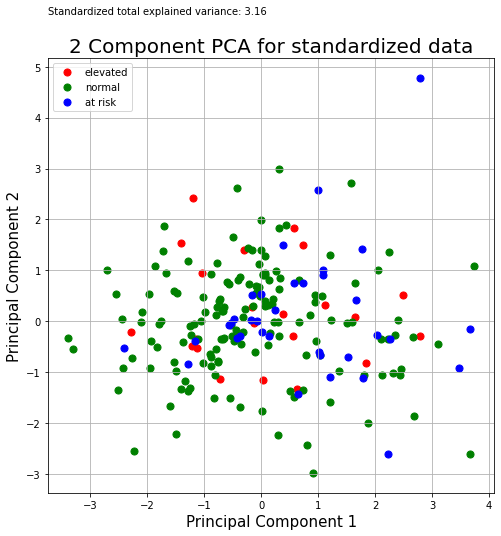

In [57]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA for standardized data', fontsize = 20)


targets = data.cholesterol.unique()
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = final_std['cholesterol'] == target
    ax.scatter(final_std.loc[indicesToKeep, 'PCA1'],
                final_std.loc[indicesToKeep, 'PCA2'],
                c = color,
                s = 50)
standard_pca_variance = sum(standard_pca.explained_variance_)


plt.annotate(f"Standardized total explained variance: {standard_pca_variance:.2f}", xycoords = 'axes fraction', xy = (0,1.1))
ax.legend(targets)
ax.grid()

##### I might've screwed up somewhere since neither of the PCA's are showing any clustering whatsoever. 

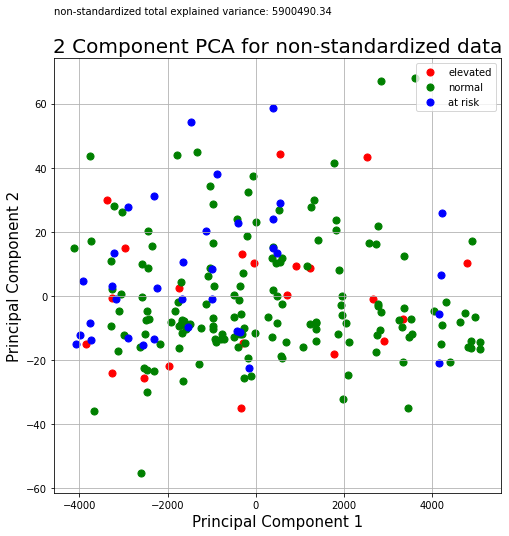

In [58]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA for non-standardized data', fontsize = 20)


targets = data.cholesterol.unique()
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = final_non_std['cholesterol'] == target
    ax.scatter(final_non_std.loc[indicesToKeep, 'PCA1'],
                final_non_std.loc[indicesToKeep, 'PCA2'],
                c = color,
                s = 50)
non_standard_pca_variance = sum(non_standard_pca.explained_variance_)


plt.annotate(f"non-standardized total explained variance: {non_standard_pca_variance:.2f}", xycoords = 'axes fraction', xy = (0,1.1))
ax.legend(targets)
ax.grid()

 

**7 d) Gather information for the next part of the exercise and print out the following things:**
- First, the standard deviation of the original data features (not standardized, and with the numeric features only).
- Second, the standard deviation of the standardized numeric features 

In [59]:
# --- Your code for 7d) here --- #

print( "+++"*3, "Standard deviations of numeric features, original data", "+++" * 3)  
print(f"{data[numeric_features].std()}")

print( "+++"*3, "Standard deviations of numeric features, standardized data", "+++" * 3)  
print(f"{zscores_df[numeric_features].std()}")

+++++++++ Standard deviations of numeric features, original data +++++++++
age       2429.010199
height       7.534648
weight      14.612326
ap_hi       17.508947
ap_lo        9.947652
dtype: float64
+++++++++ Standard deviations of numeric features, standardized data +++++++++
age       1.002389
height    1.002389
weight    1.002389
ap_hi     1.002389
ap_lo     1.002389
dtype: float64


----------
**7 e) Look at the output above and the explained variance information you added as annotations to the plots. Try to think about the following questions and give a short answer of what you think has happened:** 

1. Where do you think the difference between the amounts of explained variance might come from? 

2. Can you say something about why it is important to scale the features for PCA by looking at the evidence youve gathered?

__Answer in your own words, here it is not important to get the perfect answer but to try to think and figure out what has happened__

------------

1. Explained variance is a statistical measure of how much variation in a dataset can be attributed to each of the principal components (eigenvectors) generated by the principal component analysis (PCA) method. In very basic terms, it refers to the amount of variability in a data set that can be attributed to each individual principal component. So when the values aren't standardized and are just plain large, the variation is also large. The total variance is the sum of variances of all individual principal components so large + large = very large :D. 

2. In PCA we are interested in the components that maximize the variance. If one component (e.g. human height) varies less than another (e.g. weight) because of their respective scales (meters vs. kilos), PCA might determine that the direction of maximal variance more closely corresponds with the ‘weight’ axis, if those features are not scaled. As a change in height of one meter can be considered much more important than the change in weight of one kilogram, this is clearly incorrect.


------------------

## <font color = dollargreen > 8. Bonus: t-SNE and high dimensional data </font> 

Another method that can be used to plot high-dimensional data introduced in the lectures was t-distributed Stochastic Neighbor Embedding (t-SNE).

***8 a)*** Shortly explain t-SNE **in your own words**. 

<font color = red> Basically same as PCA, but it just plots them into 1-D plane, instead of 2-D. It finds a way to project data in to a low dimensional space -- 1 dimensional -- so that the clustering in the high dimensional space is preserved.</font>

***8 b)*** Run t-SNE for both standardized and non standardized data (as you did with PCA).

In [60]:
# TSNE was showing some annoying deprecation warnings so get rid of them
import warnings
warnings.filterwarnings('ignore')
# --- Code for 8 c) --- #
tsne = TSNE()

# create standardized and non-standardized tsne's
tsne_std = tsne.fit_transform(zscores_df)
tsne_non_std = tsne.fit_transform(data[numeric_features])

In [61]:
# verify

display(tsne_std)
display(tsne_non_std)

array([[ -2.6287231 ,  -8.598189  ],
       [  3.451518  ,   2.9012165 ],
       [  7.7773757 ,  -2.7825515 ],
       [  9.099877  , -10.162029  ],
       [  4.2591114 ,   6.7224364 ],
       [ -5.742027  ,  10.5232725 ],
       [ -1.9136647 ,  -1.802002  ],
       [  0.22858807, -11.567415  ],
       [  7.475126  ,  -4.9013643 ],
       [  9.58592   ,  -6.161535  ],
       [  5.301087  ,   7.4074693 ],
       [  0.7873735 ,  -4.276267  ],
       [  6.3363724 ,  -9.375895  ],
       [-10.138755  ,  11.956297  ],
       [  4.645741  ,   6.0808077 ],
       [ -1.5867246 ,  -9.452962  ],
       [ -0.68272185,  -3.0469398 ],
       [ 10.706948  , -10.008359  ],
       [ -4.644453  ,  -9.004615  ],
       [  1.6574271 ,  -0.7692897 ],
       [  9.460174  ,  -7.429062  ],
       [  7.418604  ,  -1.0914302 ],
       [  5.359379  ,  -8.840588  ],
       [ -3.883855  ,   4.89432   ],
       [  7.9699306 ,  -6.5337076 ],
       [ -2.8455174 ,   2.8480115 ],
       [  7.9463544 ,   0.07901213],
 

array([[  1.1388272 ,   1.202341  ],
       [ 14.248462  , -11.61774   ],
       [-12.040826  ,  11.568362  ],
       [-11.752773  ,  11.507263  ],
       [ -0.3681328 ,   1.8654977 ],
       [  1.1004049 ,   0.4718019 ],
       [ 13.633493  , -10.953053  ],
       [  5.695976  ,  -2.6246054 ],
       [-14.509036  ,  13.911129  ],
       [-13.28316   ,  12.868955  ],
       [ 11.500512  ,  -8.486814  ],
       [  4.8246946 ,  -2.16442   ],
       [-12.658559  ,  12.257215  ],
       [  8.929456  ,  -5.827878  ],
       [  5.5011444 ,  -3.0039487 ],
       [ -5.999253  ,   6.1678667 ],
       [ 11.295971  ,  -8.271541  ],
       [-13.133144  ,  12.734612  ],
       [ 11.717378  ,  -8.751452  ],
       [  9.062929  ,  -5.991614  ],
       [-14.156477  ,  13.79019   ],
       [ -9.735211  ,   9.421762  ],
       [ -9.511604  ,   9.25005   ],
       [ 14.521564  , -12.184091  ],
       [-14.187065  ,  13.820218  ],
       [ 14.4118185 , -12.14431   ],
       [-11.543538  ,  11.129395  ],
 

In [62]:
final_tsne_std = pd.DataFrame(tsne_std)

***8 c)*** Plot t-sne, similarly to PCA making the color of the points correspond to the levels of the cardio feature, but having only numerical features as a basis of the T-SNE.  

[Text(0.5, 1.0, 'Cholesterol data T-SNE projection')]

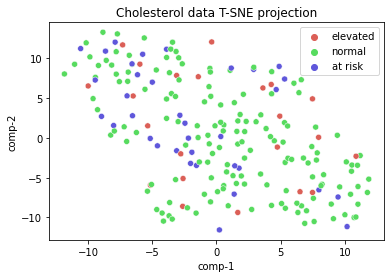

In [63]:
# non-standardized data

non_std_df = pd.DataFrame()
non_std_df['cholesterol'] = data['cholesterol']
non_std_df["comp-1"] = tsne_std[:,0]
non_std_df["comp-2"] = tsne_std[:,1]

sns.scatterplot(x = "comp-1", 
                y = "comp-2", 
                hue = non_std_df.cholesterol.tolist(),
                palette = sns.color_palette("hls", 3),
                data = non_std_df).set(title="Cholesterol data T-SNE projection") 

#### Yet again little unsure of how correct this is -- the data isnt clustered at all? If possible I'd love some feedback either in Moodle or to jrshad@utu.fi.

##### This kind of stuff is really important in my pursuit of a career in data science (= trying to transition away from my current job as a data engineer) so I'd love to know where i went wrong and how i can fix this

[Text(0.5, 1.0, 'Cholesterol data T-SNE projection')]

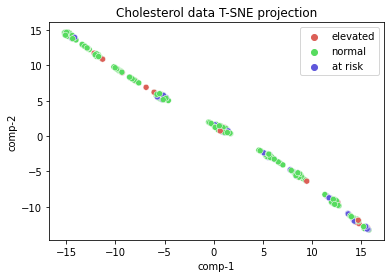

In [64]:
# Standardized
std_df = pd.DataFrame()
std_df['cholesterol'] = data['cholesterol']
std_df["comp-1"] = tsne_non_std[:,0]
std_df["comp-2"] = tsne_non_std[:,1]

sns.scatterplot(x = "comp-1", 
                y = "comp-2", 
                hue = std_df.cholesterol.tolist(),
                palette = sns.color_palette("hls", 3),
                data = std_df).set(title="Cholesterol data T-SNE projection") 

***8 d)*** 

- What do you think might have happened between the two runs of t-SNE on unstandardized and standardized data? Why is it important to standardize before using the algorithm?

_Here the aim is to think about this and learn, not come up with a perfect explanation. Googling is encouraged. Think about whether t-sne is a distance based algorithm or not?_ 

<font color = red> Scaling is very important with t-SNE since the way it works is it creates a probability distribution representing similarities between neigbors. It then calculates the distances of various points in relation to one another thus effectively clustering them based on the distances. Now the reason the data has to be standardized is that if the standard deviation of the data is something else than 1 or 2 (i dunno if those are the limits), correctly calculating the distances won't work effectively rendering t-SNE useless. </font>